In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [3]:
# Read the CSV file into a DataFrame and transpose it (rows become columns and vice versa)
df1 = pd.read_csv('predictions.csv').T

# Rename the columns of the transposed DataFrame to the specified list of model names
df1.columns = ['NB', 'KN', 'SVC', 'RF', 'LSTM_1', 'LSTM_2', 'LSTM_3', 'LSTM_4']

# Drop the first row of the DataFrame (contains the column names of the array: 0,1,2,3...)
df1 = df1.iloc[1:]

df1.head()

,NB,KN,SVC,RF,LSTM_1,LSTM_2,LSTM_3,LSTM_4
0,0,2,0,4,0,0,0,0
1,4,3,4,4,2,2,2,2
2,5,5,5,5,6,6,6,0
3,3,2,3,4,0,0,4,0
4,5,5,5,5,4,6,6,6


In [5]:
# Read the CSV file
df2=pd.read_csv('test_data_for_openAI_predictions.csv')[['text','top','OpenAI']]
df2.head()

,text,top,OpenAI
0,A defesa das terras e da cultura indígena é u...,0,Ambiente y Agricultura
1,Concretizar a gestão democrática através da pa...,4,Servidores Publicos
2,Programar as ações do Programa Saúde da Fam...,5,Salud
3,Diretrizes Orçamentárias o Orçamento Anual...,3,Servidores Publicos
4, Contratar mais médicos clínicos geral,5,Salud


In [6]:
print(df1.shape, df2.shape) #checking whether dimensions match)

(6149, 3)

In [8]:
# to facilitate the concat
df1.index = df2.index
df=pd.concat([df1,df2], axis=1)
df.head()

,NB,KN,SVC,RF,LSTM_1,LSTM_2,LSTM_3,LSTM_4,text,top,OpenAI
0,0,2,0,4,0,0,0,0,A defesa das terras e da cultura indígena é u...,0,Ambiente y Agricultura
1,4,3,4,4,2,2,2,2,Concretizar a gestão democrática através da pa...,4,Servidores Publicos
2,5,5,5,5,6,6,6,0,Programar as ações do Programa Saúde da Fam...,5,Salud
3,3,2,3,4,0,0,4,0,Diretrizes Orçamentárias o Orçamento Anual...,3,Servidores Publicos
4,5,5,5,5,4,6,6,6, Contratar mais médicos clínicos geral,5,Salud


In [9]:
df.shape

(6149, 11)

In [10]:
df['OpenAI'].value_counts()

Educacion y Deportes      1138
Trash                     1085
Ambiente y Agricultura     820
Servidores Publicos        802
Other                      785
Transporte                 444
Titulo                     422
Salud                      411
Seguridad                  129
Introduccion               113
Name: OpenAI, dtype: int64

In [11]:
# Assign numerical codes based on category groups
df['OpenAI_num']=2
df.loc[df['OpenAI']=='Titulo', 'OpenAI_num'] = 1
df.loc[df['OpenAI']=='Introduccion', 'OpenAI_num'] = 0  # Otros
df.loc[df['OpenAI']=='Other', 'OpenAI_num'] = 0  # Otros
df.loc[df['OpenAI']=='Trash', 'OpenAI_num'] = 2  # Trash
df.loc[df['OpenAI']=='Servidores Publicos', 'OpenAI_num'] = 3
df.loc[df['OpenAI']=='Educacion y Deportes', 'OpenAI_num'] = 4
df.loc[df['OpenAI']=='Salud', 'OpenAI_num'] = 5
df.loc[df['OpenAI']=='Transporte', 'OpenAI_num'] = 6
df.loc[df['OpenAI']=='Ambiente y Agricultura', 'OpenAI_num'] = 7
df.loc[df['OpenAI']=='Seguridad', 'OpenAI_num'] = 8 

In [12]:
df['OpenAI_num'].value_counts()

4    1138
2    1085
0     898
7     820
3     802
6     444
1     422
5     411
8     129
Name: OpenAI_num, dtype: int64

In [13]:
df=df.rename(columns={'top':'Y'})
predictions_df=df[['NB', 'KN', 'SVC', 'RF', 'LSTM_1', 'LSTM_2', 'LSTM_3',
       'LSTM_4', 'OpenAI_num', 'Y', 'text']]
predictions_df.sample(n=20)

,NB,KN,SVC,RF,LSTM_1,LSTM_2,LSTM_3,LSTM_4,OpenAI_num,Y,text
8,4,4,4,4,4,4,4,4,4,4,Implementação da Caravana da Alegria nos bairros
4690,3,3,3,4,4,4,4,4,3,3,no Orçamento Participativo bem como as discuss...
4978,0,7,0,4,8,8,4,4,0,0,Este distrito rural é composto por mais de
1626,4,2,4,4,5,5,5,5,3,4,Aderir aos Programas do MDS que estiverem de...
4410,4,4,4,4,4,4,4,4,4,4,- Implantação gradativa da EDUCAÇÃO EM TEMPO I...
2364,4,4,4,4,0,0,0,0,2,0,história
4201,4,4,4,4,4,4,4,4,4,4,Organizar um centro de atendimento com equip...
6022,4,4,4,4,4,4,4,4,4,4,Apoio para a participação do município em ev...
4835,4,4,4,4,4,4,4,4,8,8, Integrar as iniciativas municipais de ...
4036,0,2,0,0,4,4,4,5,0,0,\tApós\tmuitos\tanos\ttemos\toutra\tvez\tgrand...


# Performance Metrics

In [14]:
# List to store the results
results = []

# Extract true labels (Y) from the predictions_df
y_true = predictions_df['Y']

# Loop over each model (except 'Y') and calculate F1 weighted score and accuracy
for model in predictions_df.columns[:-2]:  # Exclude 'Y' and 'text' column from iteration
    y_pred = predictions_df[model]
    
    # Calculate F1 weighted score
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    
    # Append results
    results.append({'Model': model, 'F1 Weighted': f1, 'Accuracy': accuracy})

# Create a DataFrame to compare the results
results_df = pd.DataFrame(results)
results_df

,Model,F1 Weighted,Accuracy
0,NB,0.627777,0.630834
1,KN,0.433227,0.412262
2,SVC,0.626916,0.635713
3,RF,0.350839,0.423646
4,LSTM_1,0.199322,0.214832
5,LSTM_2,0.197192,0.206700
6,LSTM_3,0.192750,0.199382
7,LSTM_4,0.192595,0.198244
8,OpenAI_num,0.507330,0.488209


As shown in Table D.X, the Multinomial Naive Bayes (NB) and Support Vector Classifier (SVC) models achieved the highest performance metrics among the evaluated classifiers. These results indicate that both NB and SVC are highly effective in accurately classifying manifesto sentences into the designated policy areas, likely due to their ability to handle high-dimensional TF-IDF feature spaces and capture relevant patterns within the data.

In contrast, the K-Nearest Neighbors (KN) and Random Forest (RF) classifiers demonstrated lower performance. These
findings suggest that distance-based and ensemble methods may be less suited to this specific text classification task, potentially due to the sparsity or high dimensionality of the TF-IDF features, which can challenge the effectiveness of these algorithms.

All Long Short-Term Memory (LSTM) network variants (LSTM 1 to LSTM 4) exhibited significantly lower performance. This stark underperformance indicates that the LSTM models were not effective in capturing the sequential dependencies within the manifesto sentences for this classification task. Possible reasons include insufficient model complexity, inadequate training epochs, or challenges in effectively utilizing the tokenized and padded text data within the neural network architecture.

The OpenAI-based model (OpenAI num) achieved intermediate values for the F1-score and accuracy. While this performance is better than that of the KN and Random Forest RF classifiers, it does not surpass the NB and SVC models. This suggests that although the OpenAI model benefits from advanced language understanding capabilities, its performance in this specific classification task may require further optimization, such as refined prompt engineering or additional fine-tuning on the manifesto dataset.

Moreover, the traditional classifiers had the advantage of learning directly from the contextual nuances present in the dataset. For example, even though the prompt specifies that the manifestos are for the mayoral position in Brazil in 2012, certain words that are generally unrelated to a specific policy area may hold contextual relevance within the municipal framework.

These classifiers, trained on the specific context of municipal governance, were able to capture and leverage these context-specific relationships effectively. In contrast, the OpenAI model, operating with a more general language understanding, may not inherently grasp these subtle contextual cues without additional contextual training or more sophisticated prompt designs. This contextual learning capability likely contributed to the superior performance of NB and SVC over the OpenAI-based model in this classification task.

# Confusion matrix

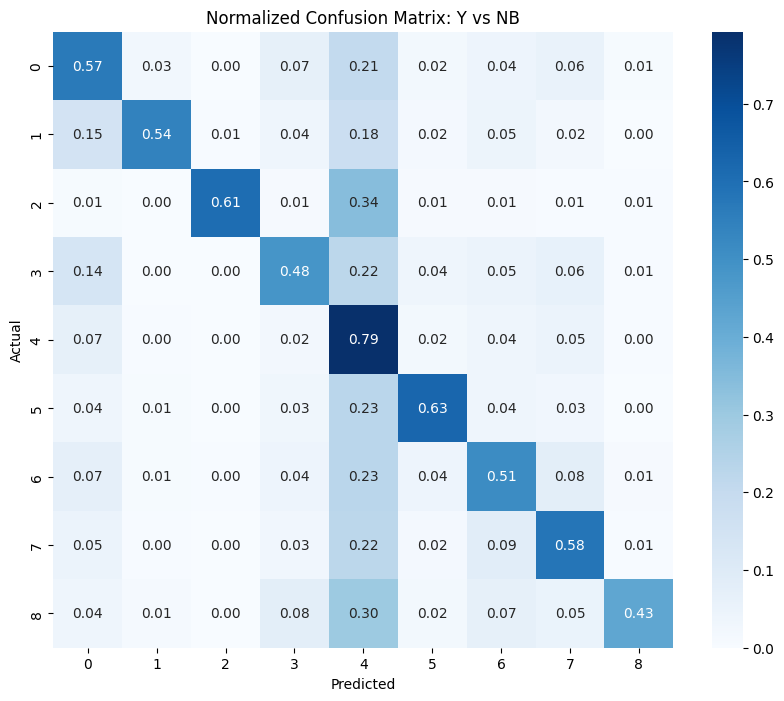

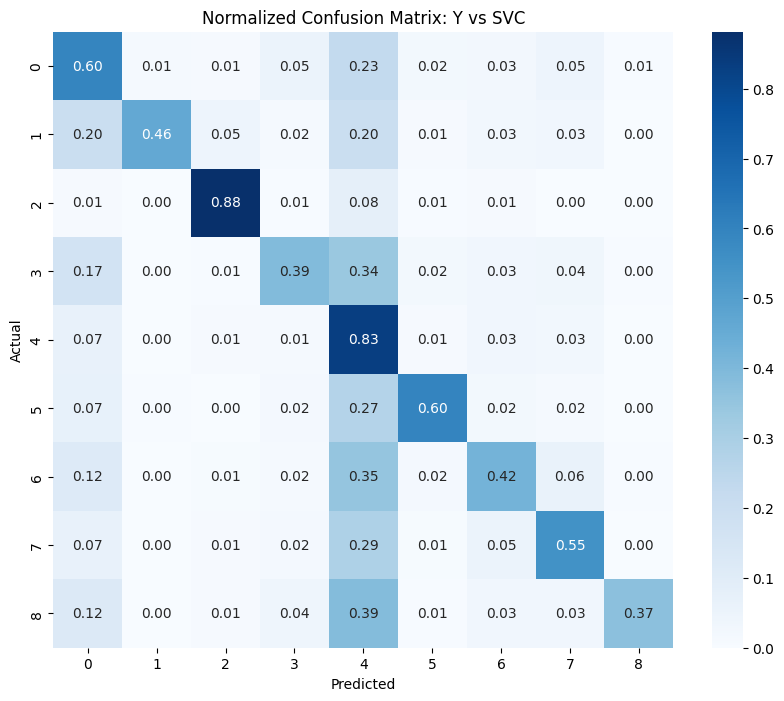

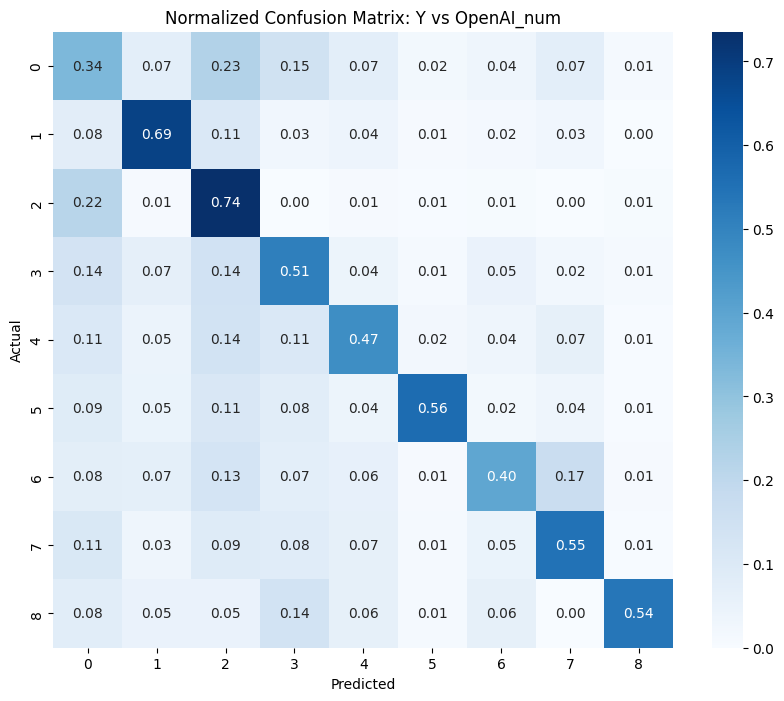

In [20]:
for i in ['NB', 'SVC', 'OpenAI_num']:
    # Compute confusion matrix
    conf_matrix = confusion_matrix(df['Y'], df[i])

    # Normalize confusion matrix by rows (actual values)
    conf_matrix_normalized = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)
    # Create a heatmap for the normalized matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', 
                xticklabels=sorted(df[i].unique()), 
                yticklabels=sorted(df['Y'].unique()))
    plt.title(f'Normalized Confusion Matrix: Y vs {i}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [27]:
# Value Counts
pd.DataFrame([df[i].value_counts() for i in ['Y','NB', 'SVC', 'OpenAI_num']]).T

,Y,NB,SVC,OpenAI_num
4,1929,2507,2744,1138
0,946,886,1007,898
7,873,765,658,820
6,629,584,440,444
5,566,487,420,411
3,511,453,325,802
2,363,228,382,1085
1,175,139,102,422
8,157,100,71,129


## Insights from the Confusion Matrix and Value Counts
The analysis of the confusion matrices and value counts highlights consistent patterns and challenges across the three models—NB, SVC, and OpenAI.

- Dominance of Class 4 (Education, Sports, and Social Policies): In the true data (Y), Class 4 is the most frequent, leading all models to overpredict this class. NB and SVC show a strong bias, with NB predicting 2,507 and SVC 2,744 instances for Class 4 compared to the true count of 1,929. This suggests overfitting to the dominant class, particularly for SVC.

- Misclassification Between Classes 0 and 4: A notable pattern across all models is the confusion between Classes 0 and 4. For instance, in NB, 20.61% of Class 0 instances are misclassified as Class 4. This indicates overlapping features or insufficient model sensitivity to distinguish these classes. Class 0 represents introductions and titles. It is logical that if Class 4 is the most discussed, it would also be overrepresented in introductions, which could lead to increased confusion.

- OpenAI's Distinct Distribution: Unlike NB and SVC, OpenAI shifts focus toward mid-sized classes such as 2 (non-sensical phrases) (1,085 predicted vs. 363 in Y) and 3 (Public Administration and Participation) (802 predicted vs. 511 in Y). While this reduces bias toward Class 4, it results in overprediction of these mid-sized classes.